In [1]:
import pandas as pd


In [4]:
df = pd.read_csv('/Users/shreyas_rl/Desktop/Reliance-Industries-Ltd-Internship/attrition/attrition.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

In [9]:
y


array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
label_encoder = LabelEncoder()
X[:,0] = label_encoder.fit_transform(X[:,0])
X[:,2] = label_encoder.fit_transform(X[:,2])
X[:,5] = label_encoder.fit_transform(X[:,5])
X[:,9] = label_encoder.fit_transform(X[:,9])
X[:,13] = label_encoder.fit_transform(X[:,13])
X[:,15] = label_encoder.fit_transform(X[:,15])
X[:,19] = label_encoder.fit_transform(X[:,19])
X[:,20] = label_encoder.fit_transform(X[:,20])

In [11]:
X

array([[2, 1102, 2, ..., 4, 0, 5],
       [1, 279, 1, ..., 7, 1, 7],
       [2, 1373, 1, ..., 0, 0, 0],
       ...,
       [2, 155, 1, ..., 2, 0, 3],
       [1, 1023, 2, ..., 6, 0, 8],
       [2, 628, 1, ..., 3, 1, 2]], dtype=object)

In [12]:
len(X[0])

33

In [13]:
y = label_encoder.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
import math
from statistics import mean



def sensit(cm):
    ans = cm[0,0]/(cm[0,0]+cm[1,0])
    return ans

def prec(cm):
    ans = cm[0,0]/(cm[0,0]+cm[0,1])
    return ans


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


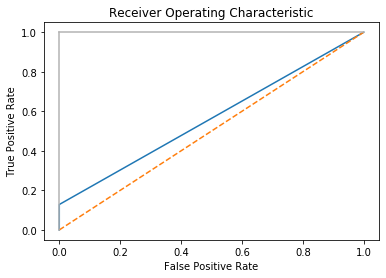

Confusion Matrix: 
[[371   0]
 [ 61   9]]
Accuracy:  [0.83108108 0.85714286 0.84931507]
Sensitivity:  0.8587962962962963
Recall Value:  [0.         0.13043478 0.04347826]
BCR:  0.2231261807563508
Precision:  1.0
F1-Score:  [0.         0.22222222 0.08333333]
MCC:  0.3322900339562814


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

acc = cross_val_score(classifier, X_test, y_test, scoring="accuracy")
sensitivity = sensit(cm)
rec = cross_val_score(classifier, X_test, y_test, scoring="recall")
bcr = math.sqrt(sensitivity*mean(rec))
p = prec(cm)
f1 = cross_val_score(classifier, X_test, y_test, scoring="f1")
mcc = matthews_corrcoef(y_test, y_pred)

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
auc = metrics.auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


print('Confusion Matrix: ')
print(cm)
print('Accuracy: ',acc)
print('Sensitivity: ',sensitivity)
print('Recall Value: ',rec)
print('BCR: ',bcr)
print('Precision: ',p)
print('F1-Score: ',f1)
print('MCC: ',mcc)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to

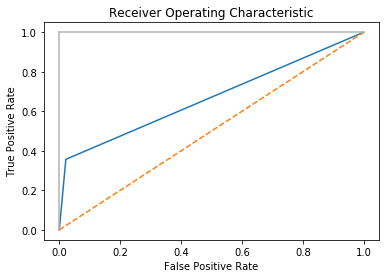

Confusion Matrix: 
[[363   8]
 [ 45  25]]
Accuracy:  [0.86486486 0.83673469 0.8630137 ]
Sensitivity:  0.8897058823529411
Recall Value:  [0.33333333 0.34782609 0.26086957]
BCR:  0.5285605388703583
Precision:  0.9784366576819407
F1-Score:  [0.44444444 0.4        0.375     ]
MCC:  0.46606271968724583


In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

acc = cross_val_score(classifier, X_test, y_test, scoring="accuracy")
sensitivity = sensit(cm)
rec = cross_val_score(classifier, X_test, y_test, scoring="recall")
bcr = math.sqrt(sensitivity*mean(rec))
p = prec(cm)
f1 = cross_val_score(classifier, X_test, y_test, scoring="f1")
mcc = matthews_corrcoef(y_test, y_pred)



false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
auc = metrics.auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


print('Confusion Matrix: ')
print(cm)
print('Accuracy: ',acc)
print('Sensitivity: ',sensitivity)
print('Recall Value: ',rec)
print('BCR: ',bcr)
print('Precision: ',p)
print('F1-Score: ',f1)
print('MCC: ',mcc)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


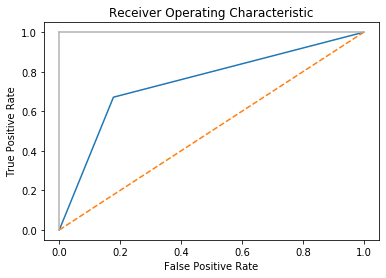

Confusion Matrix: 
[[305  66]
 [ 23  47]]
Accuracy:  [0.81756757 0.72789116 0.80821918]
Sensitivity:  0.9298780487804879
Recall Value:  [0.29166667 0.43478261 0.43478261]
BCR:  0.5999455637887813
Precision:  0.8221024258760108
F1-Score:  [0.34146341 0.33333333 0.41666667]
MCC:  0.4131181406242049


In [27]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

acc = cross_val_score(classifier, X_test, y_test, scoring="accuracy")
sensitivity = sensit(cm)
rec = cross_val_score(classifier, X_test, y_test, scoring="recall")
bcr = math.sqrt(sensitivity*mean(rec))
p = prec(cm)
f1 = cross_val_score(classifier, X_test, y_test, scoring="f1")
mcc = matthews_corrcoef(y_test, y_pred)



false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
metrics.auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('Confusion Matrix: ')
print(cm)
print('Accuracy: ',acc)
print('Sensitivity: ',sensitivity)
print('Recall Value: ',rec)
print('BCR: ',bcr)
print('Precision: ',p)
print('F1-Score: ',f1)
print('MCC: ',mcc)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


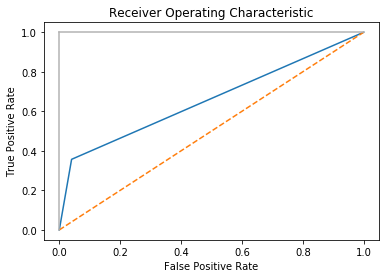

Confusion Matrix: 
[[356  15]
 [ 45  25]]
Accuracy:  [0.85135135 0.8707483  0.82191781]
Sensitivity:  0.8877805486284289
Recall Value:  [0.45833333 0.26086957 0.39130435]
BCR:  0.5732616425461855
Precision:  0.9595687331536388
F1-Score:  [0.5        0.38709677 0.40909091]
MCC:  0.4029932295079154


In [28]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

acc = cross_val_score(classifier, X_test, y_test, scoring="accuracy")
sensitivity = sensit(cm)
rec = cross_val_score(classifier, X_test, y_test, scoring="recall")
bcr = math.sqrt(sensitivity*mean(rec))
p = prec(cm)
f1 = cross_val_score(classifier, X_test, y_test, scoring="f1")
mcc = matthews_corrcoef(y_test, y_pred)



false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
metrics.auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('Confusion Matrix: ')
print(cm)
print('Accuracy: ',acc)
print('Sensitivity: ',sensitivity)
print('Recall Value: ',rec)
print('BCR: ',bcr)
print('Precision: ',p)
print('F1-Score: ',f1)
print('MCC: ',mcc)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


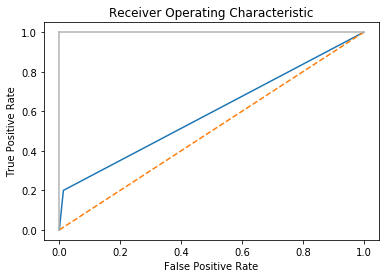

Confusion Matrix: 
[[366   5]
 [ 56  14]]
Accuracy:  [0.83108108 0.84353741 0.84931507]
Sensitivity:  0.8672985781990521
Recall Value:  [0.125      0.08695652 0.13043478]
BCR:  0.3146190773239858
Precision:  0.9865229110512129
F1-Score:  [0.19354839 0.14814815 0.21428571]
MCC:  0.33568747215801903


In [33]:
from xgboost import XGBClassifier


classifier = XGBClassifier(random_state=1,learning_rate=0.01)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

acc = cross_val_score(classifier, X_test, y_test, scoring="accuracy")
sensitivity = sensit(cm)
rec = cross_val_score(classifier, X_test, y_test, scoring="recall")
bcr = math.sqrt(sensitivity*mean(rec))
p = prec(cm)
f1 = cross_val_score(classifier, X_test, y_test, scoring="f1")
mcc = matthews_corrcoef(y_test, y_pred)


false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
metrics.auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('Confusion Matrix: ')
print(cm)
print('Accuracy: ',acc)
print('Sensitivity: ',sensitivity)
print('Recall Value: ',rec)
print('BCR: ',bcr)
print('Precision: ',p)
print('F1-Score: ',f1)
print('MCC: ',mcc)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


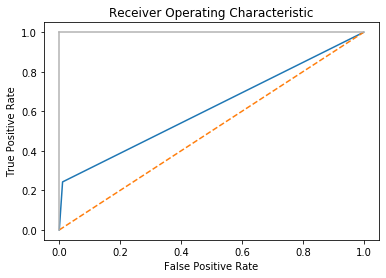

Confusion Matrix: 
[[367   4]
 [ 53  17]]
Accuracy:  [0.83108108 0.85714286 0.8630137 ]
Sensitivity:  0.8738095238095238
Recall Value:  [0.20833333 0.30434783 0.2173913 ]
BCR:  0.4611378217379497
Precision:  0.9892183288409704
F1-Score:  [0.28571429 0.4        0.33333333]
MCC:  0.3982272035664783


In [30]:
from sklearn import svm
classifier = svm.SVC(gamma = 0.001, C = 100)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

acc = cross_val_score(classifier, X_test, y_test, scoring="accuracy")
sensitivity = sensit(cm)
rec = cross_val_score(classifier, X_test, y_test, scoring="recall")
bcr = math.sqrt(sensitivity*mean(rec))
p = prec(cm)
f1 = cross_val_score(classifier, X_test, y_test, scoring="f1")
mcc = matthews_corrcoef(y_test, y_pred)


false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
metrics.auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('Confusion Matrix: ')
print(cm)
print('Accuracy: ',acc)
print('Sensitivity: ',sensitivity)
print('Recall Value: ',rec)
print('BCR: ',bcr)
print('Precision: ',p)
print('F1-Score: ',f1)
print('MCC: ',mcc)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


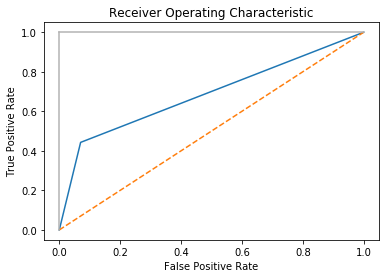

Confusion Matrix: 
[[345  26]
 [ 39  31]]
Accuracy:  [0.76351351 0.80272109 0.84246575]
Sensitivity:  0.8984375
Recall Value:  [0.16666667 0.26086957 0.47826087]
BCR:  0.5208333333333334
Precision:  0.9299191374663073
F1-Score:  [0.48148148 0.42307692 0.42553191]
MCC:  0.40605158052600454


In [31]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

acc = cross_val_score(classifier, X_test, y_test, scoring="accuracy")
sensitivity = sensit(cm)
rec = cross_val_score(classifier, X_test, y_test, scoring="recall")
bcr = math.sqrt(sensitivity*mean(rec))
p = prec(cm)
f1 = cross_val_score(classifier, X_test, y_test, scoring="f1")
mcc = matthews_corrcoef(y_test, y_pred)


false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
metrics.auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


print('Confusion Matrix: ')
print(cm)
print('Accuracy: ',acc)
print('Sensitivity: ',sensitivity)
print('Recall Value: ',rec)
print('BCR: ',bcr)
print('Precision: ',p)
print('F1-Score: ',f1)
print('MCC: ',mcc)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


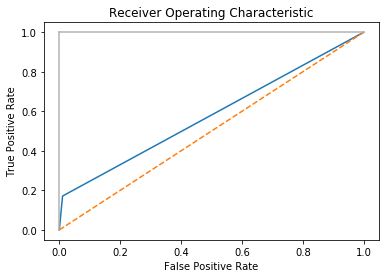

Confusion Matrix: 
[[367   4]
 [ 58  12]]
Accuracy:  [0.83108108 0.85034014 0.84931507]
Sensitivity:  0.8984375
Recall Value:  [0.08333333 0.04347826 0.04347826]
BCR:  0.5208333333333334
Precision:  0.9299191374663073
F1-Score:  [0.14285714 0.08333333 0.08333333]
MCC:  0.40605158052600454


In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train) 

importances = classifier.feature_importances_

y_pred = classifier.predict(X_test)

acc = cross_val_score(classifier, X_test, y_test, scoring="accuracy")
f1 = cross_val_score(classifier, X_test, y_test, scoring="f1")
rec = cross_val_score(classifier, X_test, y_test, scoring="recall")
cm = confusion_matrix(y_test, y_pred)


false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
metrics.auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 



print('Confusion Matrix: ')
print(cm)
print('Accuracy: ',acc)
print('Sensitivity: ',sensitivity)
print('Recall Value: ',rec)
print('BCR: ',bcr)
print('Precision: ',p)
print('F1-Score: ',f1)
print('MCC: ',mcc)